### 第0000题
将你的 QQ 头像（或者微博头像）右上角加上红色的数字，类似于微信未读信息数量那种提示效果。 类似于图中效果

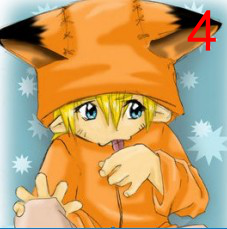

In [20]:
from PIL import Image, ImageDraw, ImageFont
# from IPython.display import Image as Ipython_img
img_path = r"C:\Users\jiang\Desktop\pic.jpg"
font_path = "c:/Windows/fonts/SIMHEI.ttf"
picture = Image.open(img_path, mode='r')
fnt = ImageFont.truetype(font_path, 60)
draw = ImageDraw.Draw(picture)
draw.text((picture.size[0] - 40, 0), "4",font=fnt, fill=(255,0,0,255))
picture.save(r"C:\Users\jiang\Desktop\test.jpg", 'jpeg')
picture # display

### 第0001题
做为 Apple Store App 独立开发者，你要搞限时促销，为你的应用生成激活码（或者优惠券），使用 Python 如何生成 200 个激活码（或者优惠券）？

In [3]:
import numpy as np, string
def gen_tickets(tickets_num, tickets_len):
    idx = np.random.randint(0, 25, tickets_num * tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    return [s[i*tickets_len : (i+1)*tickets_len] for i in range(tickets_num)]

## 测试
print gen_tickets(5, 100)

['DXJWBMUBRUJJEUWVYSXIQRAEKYKLCIGWTXQOFBAWSNMCIGBTXREFRPSJFPECCHMPEHJUCDVESOBKVMWLLHJSQVPWHJYULMJUSCNT', 'WHVQISBKMRJFKDQTSBFYALTJHBIBSNKWWPYXBSICUJMLNVUUTJPNLYBFBGVXKPFBGWPBXRUYXMWASUOOPPFWPNVPBNIDKGGYXJDT', 'LKWOJKYSMKIXTCSDUKRVNSTWGKEDMDGUWUEUJUFNNTLKHKWBWGVPNYIUQILXEDGLSLOPQFRDJAKVASORDLSRTOTOPYHAUYGFSDNS', 'DYGJWXUGOXYJMSVYCFNAMOARLPWCOJXCPQADFEDDWBQXNOUJHOPECNALKDNSSBNKDYODHYPEXOPBQGPWYESQOYKEFFQYSKAULPYW', 'VJDKKBVDETJXUEASFGUPENEVCNMTKLXYSTMBNQWKIOAPFLGAKHVYGLVRULEVLBPFTJUQDMDNQJROKBEPQSOXJCUHDDIXBBSQHXIO']


### 第0002题
将 0001 题生成的 200 个激活码（或者优惠券）保存到 MySQL 关系型数据库中。

In [5]:
import numpy as np, string
def gen_a_ticket(tickets_len):
    idx = np.random.randint(0, 25, tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    yield s

import MySQLdb
db = MySQLdb.connect("localhost", "root", "******", "database_for_python")
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS python_tickets")
sql = """CREATE TABLE python_tickets(
            num INT,
            ticket_code CHAR(100))"""
cursor.execute(sql)

for i in range(1, 201):
    ticket = gen_a_ticket(100).next()
    sql = "INSERT INTO python_tickets VALUES ('%d', '%s')" % (i, ticket)
    cursor.execute(sql)
    db.commit()
db.close()

### 第0003题
将 0001 题生成的 200 个激活码（或者优惠券）保存到 Redis 非关系型数据库中。

In [17]:
import numpy as np, string
def gen_a_ticket(tickets_len):
    idx = np.random.randint(0, 25, tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    yield s

import redis
rd = redis.Redis(host='localhost', port=6379, db=0)
for i in range(1, 201):
    ticket = gen_a_ticket(100).next()
    rd.set(i, ticket)
rd.save()

# test
print rd.get(55)

BXDOGQPIPQPMEDPLOJRAOAFUOFJPMBMWANNVFDYMFGXFKRQKWBYQOOJRQGTIJYEQKOKBYTSXILDFULVNHYAKQYRKMILWMCPNXAKQ


### 第0004题
任一个英文的纯文本文件，统计其中的单词出现的个数。

In [41]:
#coding=utf-8
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer()
text_path = r"C:\Users\jiang\Desktop\Github_Pages.txt"  #utf-8 without BOM
with open(text_path, 'r') as f:
    s = f.readlines()
    X = vectorizer.fit_transform(s)
words = vectorizer.get_feature_names()
counts = np.sum(X.toarray(), 0).tolist()
results = sorted(zip(words, counts), key=lambda x:x[1], reverse=True)
for word, count in results: # print results
    print word, count

you 20
the 18
to 17
if 11
your 11
and 10
file 10
or 10
pages 9
as 8
github 8
with 8
in 7
that 7
have 6
jekyll 6
layout 6
page 6
these 6
by 5
can 5
don 5
ll 5
markdown 5
now 5
repository 5
site 5
we 5
all 4
an 4
are 4
be 4
default 4
for 4
from 4
index 4
of 4
on 4
any 3
build 3
config 3
doesn 3
existing 3
features 3
files 3
may 3
publishing 3
readme 3
theme 3
title 3
use 3
website 3
adding 2
additional 2
affect 2
at 2
changes 2
content 2
elsewhere 2
exclude 2
expect 2
explicitly 2
feel 2
few 2
front 2
get 2
how 2
it 2
just 2
like 2
look 2
matter 2
more 2
most 2
need 2
re 2
set 2
shouldn 2
sites 2
software 2
specify 2
such 2
there 2
three 2
via 2
100th 1
above 1
activate 1
add 1
advanced 1
again 1
allow 1
already 1
although 1
appears 1
assign 1
authoring 1
automatically 1
based 1
begin 1
begins 1
behind 1
bring 1
browse 1
browser 1
but 1
clicks 1
commit 1
context 1
continue 1
control 1
course 1
create 1
customizable 1
customizations 1
dependency 1
directive 1
directory 1
disable 1
dissimi

### 第0005题
你有一个目录，装了很多照片，把它们的尺寸变成都不大于 iPhone5 分辨率的大小。

In [9]:
from PIL import Image
import os
imgs_path = r"C:\Users\jiang\Desktop\pictures"
for root, dirs, files in os.walk(imgs_path):
    for f in files:
        img = Image.open(os.path.join(root, f))
        img = img.resize([64, 100]).save(os.path.join(root, 'rs_' + f), 'jpeg')

### 第0006题
你有一个目录，放了你一个月的日记，都是 txt，为了避免分词的问题，假设内容都是英文，请统计出你认为每篇日记最重要的词。

In [130]:
from bs4 import BeautifulSoup
import urllib2
def get_links_from_url(url):
    html_page = urllib2.urlopen(url)
    links = BeautifulSoup(html_page).findAll('a')
    links = [i.get('href') for i in links if i.get('href') and not i.get('href').startswith('javascript:')] # 去掉javascript开头的
    proto, rest = urllib2.splittype(url)
    domain = urllib2.splithost(rest)[0]
    links = map(lambda i: proto + '://' + domain + i if i[0] == '/' else url + i if i[0] == '#' else i, links) # 把链接补全
    return links

def get_article_links():
    url = "http://www.jianshu.com/"
    links = get_links_from_url(url)
    links = [i for i in links if i.startswith('http://www.jianshu.com/c/')] # 类别
    links_class = list(set(links))
    links_article = list()
    for link in links_class:
        links = get_links_from_url(link)
        links = [i for i in links if i.startswith('http://www.jianshu.com/p/') and not i.endswith('#comments')] # 文章
        links = list(set(links))
        links_article.extend(links)
    links_article = list(set(links_article))
    return links_article

from goose import Goose
from goose.text import StopWordsChinese
import os

def save_articles_from_links(links, articles_path):
    g = Goose({'stopwords_class': StopWordsChinese})
    for url in links:
        article = g.extract(url=url)
        valid_title = map(lambda i : " " if not (
                             (u'\u4e00' <= i <=u'\u9fff') or 
                             (u'\u0030' <= i <=u'\u0039') or
                             (u'\u0041' <= i <= u'\u005a') or 
                             (u'\u0061' <= i <= u'\u007a') ) else i, article.title)
        valid_title = ''.join(valid_title)
        article_file = os.path.join(articles_path, valid_title + '.txt')
        with open(article_file, 'w') as f:
            f.write(article.cleaned_text.encode('utf-8'))

# 从简书网站中提取文章，存入本地文件中
articles_path = r"C:\Users\jiang\Desktop\articles"
links = get_article_links()
save_articles_from_links(links, articles_path)

# 由TF-IDF判断词的重要性
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import jieba
import os

vectorizer=CountVectorizer()
transformer=TfidfTransformer()
articles_path = r"C:\Users\jiang\Desktop\articles"
corpus = []
titles = []
for root, dirs, files in os.walk(articles_path):
    for title in files:
        titles.append(title)
        file_name = os.path.join(root, title)
        with open(file_name) as f:
            s = f.read()
            words = jieba.lcut(s, cut_all=True)
            s = ' '.join(words)
            corpus.append(s)

vectorizer=CountVectorizer()
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
word=vectorizer.get_feature_names()
weight=tfidf.toarray()
for i in range(len(weight)):
    print "-------------------------------------------------------------------------------------"
    print "文章", i, ":", titles[i].decode('gbk')
    w = weight[i][::]
    tmp = zip(word, w)
    tmp = sorted(tmp, key=lambda i : i[1], reverse=True)
    print "最重要的词："
    for j in range(5):
        print "word:", tmp[j][0], "TF-IDF:", tmp[j][1]

-------------------------------------------------------------------------------------
文章 0 :  上班这点事儿 专题投稿要求及首页推荐须知 3 0.txt
最重要的词：
word: 文章 TF-IDF: 0.34914252357
word: 主编 TF-IDF: 0.29861176383
word: 上班 TF-IDF: 0.282449358375
word: 推荐 TF-IDF: 0.178387012477
word: 原创 TF-IDF: 0.177840660974
-------------------------------------------------------------------------------------
文章 1 :  婚誓轻许 韶华不负 第七十三章 倾诉 你要听话知不知道 .txt
最重要的词：
word: 知道 TF-IDF: 0.258822098297
word: 抑郁 TF-IDF: 0.20662776956
word: 怎么 TF-IDF: 0.170551908394
word: 怎样 TF-IDF: 0.153088165202
word: 不知 TF-IDF: 0.145092207038
-------------------------------------------------------------------------------------
文章 2 :  年味大作战 别让你的年味 只剩俗气 .txt
最重要的词：
word: 腊肉 TF-IDF: 0.466418318534
word: 味儿 TF-IDF: 0.423319796494
word: 风味 TF-IDF: 0.186567327414
word: 牛肉 TF-IDF: 0.141106598831
word: 过年 TF-IDF: 0.128142208302
-------------------------------------------------------------------------------------
文章 3 :  影视天堂 专题投稿要求及首页推荐须知.txt
最重要的词：
word: 文章 TF

### 第0007题
有个目录，里面是你自己写过的程序，统计一下你写过多少行代码。包括空行和注释，但是要分别列出来。

In [31]:
code_path = r'C:\Users\jiang\Documents\MATLAB' #matlab files
import os
file_count, code_line_count, blank_line_count, comment_line_count = 0, 0, 0, 0
for root, dirs, files in os.walk(code_path):
    for f in files:
        if f.endswith('.m'):
            file_count += 1
            with open(os.path.join(root, f), 'r') as cur_f:
                for line in cur_f:
                    if line.strip().startswith('%'):
                        comment_line_count += 1
                    elif line.isspace():
                        blank_line_count += 1
                    else:
                        code_line_count += 1
print "file_count, code_line_count, blank_line_count, comment_line_count: "
print file_count, code_line_count, blank_line_count, comment_line_count

file_count, code_line_count, blank_line_count, comment_line_count: 
893 36136 10000 18544


### 第0008题
一个HTML文件，找出里面的正文。

In [23]:
from goose import Goose
from goose.text import StopWordsChinese
url = "http://www.jianshu.com/p/05cfea46e4fd"
html_doc = r"C:\Users\jiang\Desktop\2016年人工智能领域的总结与思考：未来将面临的五大考验 - 简书.html"
with open(html_doc.decode('utf8'), 'r') as f:
    words = f.read()
g = Goose({'stopwords_class': StopWordsChinese})
article = g.extract(raw_html=words)
print(article.title)
print(article.cleaned_text)

2016年人工智能领域的总结与思考：未来将面临的五大考验
写了143754字 ， 被682人关注 ， 获得了1119个喜欢

这两天，有朋友感慨道：“2016年对人工智能来说是意义非凡的一年，或许在技术领域的感知并不明显，在商业层面的「成功」却是前所未有的。”是呀，从年初AlphaGo和李世石的围棋大战，再到一场场和人工智能有关的发布会。不管怎样，人工智能终于跳出了实验室的禁锢，成为活跃在科技领域的核心力量。 今天，投投就与你分享一篇有关人工智能的好文，内容来源于前段时间「投资人说」联合「华兴逐鹿X」的一场线下交流会，当时我们邀请了几位人工智能领域的行业专家深度聊了聊自己对此的认识。为了让你读到最新的行业真知，投投在文中适当融合了一些人工智能领域权威人士的最新观点，希望能对你有所启发。

每当一个事物兴起的时候，随之而来的就是大量的观点与推测，其中最受欢迎的往往是那些最大胆的；而后每增加一个论据，都会让我们对这个观点更加深信无疑。就像从Alpha Go战胜李世石后，人工智能在舆论中强势回暖，而后李彦宏在世界互联网大会上的言论，也再度加强了人们对它的关注。

不仅百度，马化腾在2015年6月的演讲中也说道：人工智能是我最想做的事情。马云也在2015年5月内部信中写道：未来三十年云计算、大数据、人工智能等技术将会让无数的梦想成真。

目前国际互联网巨头纷纷入场， 亚马逊的 Alexa、苹果的 Siri、微软的 Cortana，作为人工智能的第一块敲门砖，已经被较为广泛的使用；搜索、翻译、地图、无人车，深度学习的影子无处不在，人工智能正在重构人类的生活。

同时，伴随互联网的高速发展和底层技术的不断进步，人工智能所需的「能源」正在不断完善。

1）数据量： 2000年至今，互联网及移动互联网的高速发展使得数据实现了量的积累，据IDC预测，2020年全球的大数据总量将为40ZB，其中有七成将会以图片和视频的形式进行存储，这为人工智能的发展提供了丰厚的土壤。

2）深度学习算法：多伦多大学教授Geoffrey Hinton（致力于神经网络和深度学习研究）的学生在业内知名的图像识别比赛ImageNet中利用深度学习的算法将识别错误率一举降低了10%，甚至超过了谷歌，深度学习进而名声大噪。2015年，微软亚洲研究院视觉计算组在该项比赛中夺冠，将系统错误率降低至3.57%，已经超过

### 第0009题
一个HTML文件，找出里面的链接。

In [32]:
from bs4 import BeautifulSoup
import urllib2
url = "http://www.jianshu.com/p/05cfea46e4fd"
html_page = urllib2.urlopen(url)
links = BeautifulSoup(html_page).findAll('a')
links = [i.get('href') for i in links if i.get('href') and not i.get('href').startswith('javascript:')] # 去掉javascript开头的
proto, rest = urllib2.splittype(url)
domain = urllib2.splithost(rest)[0]
links = map(lambda i: proto + '://' + domain + i if i[0] == '/' else url + i if i[0] == '#' else i, links) # 把链接补全
for link in links:
    print(link)

http://www.jianshu.com/
http://www.jianshu.com/collections
http://www.jianshu.com/apps/download?utm_medium=top-sugg-down&utm_source=web-other-page
http://www.jianshu.com/sign_up
http://www.jianshu.com/sign_in
http://www.jianshu.com/
http://www.jianshu.com/collections
http://www.jianshu.com/apps
https://itunes.apple.com/cn/app/jian-shu-hei-ye-ban-quan-xin/id1142989247?l=en&mt=8
http://downloads.jianshu.io/apps/haruki/JianShu-2.0.1.apk
http://www.jianshu.com/p/05cfea46e4fd#view-mode-modal
http://www.jianshu.com/sign_in
http://www.jianshu.com/p/05cfea46e4fd#
http://www.jianshu.com/writer#/
http://www.jianshu.com/apps/download?utm_medium=top-sugg-down&utm_source=note-show
http://www.jianshu.com/sign_up
http://www.jianshu.com/sign_in
http://www.jianshu.com/sign_in
http://www.jianshu.com/users/301be822c79b
http://www.jianshu.com/users/301be822c79b
http://www.jianshu.com/sign_in
http://www.jianshu.com/p/05cfea46e4fd#pay-modal
http://www.jianshu.com/sign_in
http://www.jianshu.com/p/05cfea46e4f

### 第0010题
使用 Python 生成类似于下图中的字母验证码图
![](https://camo.githubusercontent.com/f80e7aa0d43b3685657b4d329f2809a28c82e12a/687474703a2f2f692e696d6775722e636f6d2f615668626567562e6a7067)

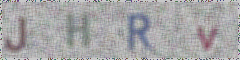

In [86]:
import string, random
from PIL import Image, ImageFont, ImageFilter, ImageDraw

def get_random_color():
    return tuple([random.randint(50, 150) for _ in range(3)])

def get_verify_picture():
    font_path = "c:/Windows/fonts/SIMHEI.ttf"
    letters = [random.choice(string.letters) for i in range(4)]
    font = ImageFont.truetype(font_path, 50)
    width, height = 240, 60
    pic = Image.new('RGB', (width, height), (200, 200, 200))
    draw = ImageDraw.Draw(pic)
    for i, letter in enumerate(letters):
        draw.text((60 * i + random.randrange(0, 20), random.randrange(0, 10)), letter, font=font, fill=get_random_color())
    for i in range(5000):
        draw.point((random.randint(0,width), random.randint(0,height)), fill=get_random_color())
    return pic.filter(ImageFilter.BLUR)

get_verify_picture()

### 第0011题

敏感词文本文件 filtered_words.txt，里面的内容为以下内容，当用户输入敏感词语时，则打印出 Freedom，否则打印出 Human Rights。

> 北京
> 程序员
> 公务员
> 领导
> 牛比
> 牛逼
> 你娘
> 你妈
> love
> sex
> jiangge

In [ ]:
import sys, locale
filtered_words = r"C:\Users\jiang\Desktop\filtered_words.txt"
filtered_words_dict = {}
with open(filtered_words) as f:
    for line in f:
        word = line.strip()
        if not filtered_words_dict.has_key(word):
            filtered_words_dict[word] = True
while True:
    if filtered_words_dict.has_key(raw_input().decode(sys.stdin.encoding or locale.getpreferredencoding(True)).encode('utf-8')):
        print("Freedom")
    else:
        print("Human Rights")

程序员
Freedom
程序猿
Human Rights


### 第0012题

敏感词文本文件 filtered_words.txt，里面的内容 和 0011题一样，当用户输入敏感词语，则用 星号 \* 替换，例如当用户输入「北京是个好城市」，则变成「**是个好城市」。

In [ ]:
import sys, locale
filtered_words = r"C:\Users\jiang\Desktop\filtered_words.txt"
filtered_words_dict = {}
with open(filtered_words) as f:
    for line in f:
        word = line.strip()
        if not filtered_words_dict.has_key(word):
            filtered_words_dict[word] = True
while True:
    s = raw_input().decode(sys.stdin.encoding or locale.getpreferredencoding(True)).encode('utf-8')
    for key in filtered_words_dict.keys():
        while s.find(key) != -1:
            start = s.find(key)
            if start != -1:
                s = s[: start] + '*' + s[start + len(key) :]
    print s

北京的程序员和公务员的领导是牛比还是牛逼？你娘和你妈 love sex jiangge
*的*和*的*是*还是*？*和* * * *
北京是个好城市
*是个好城市


### 第 0013 题

用 Python 写一个爬图片的程序，爬[这个链接里的日本妹子图片 :-)](http://tieba.baidu.com/p/2166231880)

[参考代码](https://www.v2ex.com/t/61686)

In [14]:
import requests
import lxml.html

url = "http://tieba.baidu.com/p/2166231880"
path = "C:\\Users\\jiang\\Desktop\\imgs\\"
page = requests.get(url).text
doc = lxml.html.document_fromstring(page)
for idx, el in enumerate(doc.cssselect('img.BDE_Image')):
    with open(path + '%03d.jpg' % idx, 'wb') as f:
        f.write(requests.get(el.attrib['src']).content)

### 第 0014 题：
纯文本文件 student.txt为学生信息, 里面的内容（包括花括号）如下所示：
```
{
    "1":["张三",150,120,100],
    "2":["李四",90,99,95],
    "3":["王五",60,66,68]
}
```

请将上述内容写到 student.xls 文件中，如下图所示：
![](https://camo.githubusercontent.com/18dea9401449e4ca894d40d55134d9c28083280d/687474703a2f2f692e696d6775722e636f6d2f6e50446c706d652e6a7067)

In [30]:
#encoding:utf-8
#使用pandas进行转换
import pandas as pd

txt_path = r'C:\Users\jiang\Desktop\student.txt'
excel_path = r"C:\Users\jiang\Desktop\student.xls"
with open(txt_path) as f:
    s = eval(f.read(), {})
    for v in s.values():
        for i in range(len(v)):
            if isinstance(v[i], basestring):
                v[i] = str(v[i]).decode('utf-8') #把dict所有的字符串转成'utf-8'编码
s = pd.DataFrame(s).T
s.to_excel(excel_path, 'student', header=False)

### 第0015题
纯文本文件 city.txt为城市信息, 里面的内容（包括花括号）如下所示：
```
{
    "1" : "上海",
    "2" : "北京",
    "3" : "成都"
}
```

请将上述内容写到 city.xls 文件中，如下图所示：
![](https://camo.githubusercontent.com/61120377319bfe5520c9d73f51776f923d6bd3b7/687474703a2f2f692e696d6775722e636f6d2f724f4862557a672e706e67)

In [2]:
#encoding:utf-8
#使用pandas进行转换
import pandas as pd

txt_path = r'C:\Users\jiang\Desktop\city.txt'
excel_path = r"C:\Users\jiang\Desktop\city.xls"
with open(txt_path) as f:
    s = eval(f.read(), {})
    for k, v in s.items():
        if isinstance(v, basestring):
            s[k] = str(v).decode('utf-8') #把dict中所有的字符串转成'utf-8'编码
s = pd.DataFrame(s, index=[0]).T
s.to_excel(excel_path, 'city', header=False)

### 第0016题

纯文本文件 numbers.txt, 里面的内容（包括方括号）如下所示：
```
[
    [1, 82, 65535], 
    [20, 90, 13],
    [26, 809, 1024]
]
```

请将上述内容写到 numbers.xls 文件中，如下图所示：
![](https://camo.githubusercontent.com/60da4d596289212b517547ddcc2408bfc9f39087/687474703a2f2f692e696d6775722e636f6d2f69757a305062762e706e67)

In [16]:
#encoding:utf-8
#使用pandas进行转换
import pandas as pd

txt_path = r'C:\Users\jiang\Desktop\numbers.txt'
excel_path = r"C:\Users\jiang\Desktop\numbers.xls"
with open(txt_path) as f:
    s = eval(f.read(), {})
s = pd.DataFrame(s)
s.to_excel(excel_path, 'numbers', header=False, index=False)

### 第0017题

将第0014题中的 student.xls 文件中的内容写到 student.xml 文件中，如下所示：

```xml

<?xml version="1.0" encoding="UTF-8"?>
<root>
<students>
<!-- 
    学生信息表
    "id" : [名字, 数学, 语文, 英文]
-->
{
    "1" : ["张三", 150, 120, 100],
    "2" : ["李四", 90, 99, 95],
    "3" : ["王五", 60, 66, 68]
}
</students>
</root>

```


In [6]:
import xlrd #使用xlrd读取xls
import json #使用json.dumps()格式化dict输出
xls_path = r'C:\Users\jiang\Desktop\student.xls'
xml_path = r"C:\Users\jiang\Desktop\student.xml"

data = xlrd.open_workbook(xls_path)
with open(xml_path, 'w') as f:
    f.write(r'<?xml version="1.0" encoding="UTF-8"?>')
    f.write("\n<root>\n")
    for sheet in data.sheets():
        f.write('<students>\n<!-- \n\t学生信息表\n\t"id" : [名字, 数学, 语文, 英文]\n-->\n')
        sheet_dict = {}
        for i in range(sheet.nrows):
            sheet_dict[sheet.cell_value(i, 0)] = [sheet.cell_value(i, j) for j in range(1, sheet.ncols)]
        s = json.dumps(sheet_dict, ensure_ascii=False, indent=4, sort_keys=True)
        f.write(s.encode('utf-8'))
        f.write("\n</students>\n")
    f.write("<root>")

### 第0018题

将第0015题中的 city.xls 文件中的内容写到 city.xml 文件中，如下所示：
```xml
<?xmlversion="1.0" encoding="UTF-8"?>
<root>
<citys>
<!-- 
    城市信息
-->
{
    "1" : "上海",
    "2" : "北京",
    "3" : "成都"
}
</citys>
</root>
```

In [5]:
import xlrd #使用xlrd读取xls
import json #使用json.dumps()格式化dict输出
xls_path = r'C:\Users\jiang\Desktop\city.xls'
xml_path = r"C:\Users\jiang\Desktop\city.xml"

data = xlrd.open_workbook(xls_path)
with open(xml_path, 'w') as f:
    f.write(r'<?xml version="1.0" encoding="UTF-8"?>')
    f.write("\n<root>\n")
    for sheet in data.sheets():
        f.write('<citys>\n<!-- \n\t城市信息\n-->\n')
        sheet_dict = {}
        for i in range(sheet.nrows):
            sheet_dict[sheet.cell_value(i, 0)] = sheet.cell_value(i, 1)
        s = json.dumps(sheet_dict, ensure_ascii=False, indent=4, sort_keys=True)
        f.write(s.encode('utf-8'))
        f.write("\n</citys>\n")
    f.write("<root>")

### 第0019题

将第0016题中的 numbers.xls 文件中的内容写到 numbers.xml 文件中，如下所示：
```xml
<?xml version="1.0" encoding="UTF-8"?>
<root>
<numbers>
<!-- 
    数字信息
-->

[
    [1, 82, 65535],
    [20, 90, 13],
    [26, 809, 1024]
]

</numbers>
</root>
```

In [9]:
import xlrd #使用xlrd读取xls
import json #使用json.dumps()格式化dict输出
xls_path = r'C:\Users\jiang\Desktop\numbers.xls'
xml_path = r"C:\Users\jiang\Desktop\numbers.xml"

data = xlrd.open_workbook(xls_path)
with open(xml_path, 'w') as f:
    f.write(r'<?xml version="1.0" encoding="UTF-8"?>')
    f.write("\n<root>\n")
    for sheet in data.sheets():
        f.write('<numbers>\n<!-- \n\t数字信息\n-->\n')
        sheet_list = []
        for i in range(sheet.nrows):
            sheet_list.append([sheet.cell_value(i, j) for j in range(sheet.ncols)])
        s = json.dumps(sheet_list, ensure_ascii=False, indent=4, sort_keys=True)
        f.write(s.encode('utf-8'))
        f.write("\n</numbers>\n")
    f.write("<root>")

### 第0020题

登陆中国联通网上营业厅 后选择「自助服务」 --> 「详单查询」，然后选择你要查询的时间段，点击「查询」按钮，查询结果页面的最下方，点击「导出」，就会生成类似于 2014年10月01日～2014年10月31日通话详单.xls 文件。写代码，对每月通话时间做个统计。

In [1]:
import pandas as pd
xls_path = r'C:\Users\jiang\Desktop\201612_通话详单.xls'
df = pd.read_excel(xls_path.decode('utf-8'))
df = df.to_dict()
ts = df[u'通信时长'].values()

shi, fen, miao = 0, 0, 0
for t in ts:
    try:
        s = t.find(u'时')
        f = t.find(u'分')
        m = t.find(u'秒')
        if s != -1:
            shi += int(t[:s])
        if f != -1:
            fen += int(t[s+1:f])
        if m != -1:
            miao += int(t[f+1:m])
    except:
        pass
fen += miao / 60
miao %= 60
shi += fen / 60
fen %= 60
print("通信时长：%d时%d分%d秒" % (shi, fen, miao))

通信时长：0时59分11秒


### 第0021题

通常，登陆某个网站或者 APP，需要使用用户名和密码。密码是如何加密后存储起来的呢？请使用 Python 对密码加密。

+ 阅读资料 [用户密码的存储与 Python 示例](http://zhuoqiang.me/password-storage-and-python-example.html)

+ 阅读资料 [Hashing Strings with Python](http://pythoncentral.io/hashing-strings-with-python/)

+ 阅读资料 [Python's safest method to store and retrieve passwords from a database](http://stackoverflow.com/questions/2572099/pythons-safest-method-to-store-and-retrieve-passwords-from-a-database)

In [33]:
import os
from hashlib import sha256
from hmac import HMAC

def encrypt_password(password, salt=None):
    if salt is None:
        salt = os.urandom(8)
    for i in xrange(10):
        result = HMAC(password, salt, sha256).digest()
    return salt + result

def validate_password(hashed, input_password):
    return hashed == encrypt_password(input_password, salt=hashed[:8])

my_password = '12345678'
hashed = encrypt_password(my_password)
print 'my_password:', my_password
print 'hashed: ', hashed
print validate_password(hashed, my_password)
print validate_password(hashed, '1234567')

my_password: 12345678
hashed:  �m���byjJ���=5��S��I�>��o�P}iFAZ!��h�^
True
False


### 第0022题

iPhone 6、iPhone 6 Plus 早已上市开卖。请查看你写得 第 0005 题的代码是否可以复用。

In [4]:
from PIL import Image
import os
imgs_path = r"C:\Users\jiang\Desktop\pictures"
picture_size = [64, 100]

def change_pic_size(imgs_path, picture_size):
    for root, dirs, files in os.walk(imgs_path):
        for f in files:
            img = Image.open(os.path.join(root, f))
            img = img.resize(picture_size).save(os.path.join(root, 'rs_' + f), 'jpeg')

change_pic_size(imgs_path, picture_size)

### 第0023题

使用 Python 的 Web 框架，做一个 Web 版本 留言簿 应用。


In [46]:
# 跟随 Flask 的教程，可以做一个微博客应用，和这个差不多：http://docs.jinkan.org/docs/flask/tutorial/index.html
# 最后先看一下 Flask 的快速入门：http://docs.jinkan.org/docs/flask/quickstart.html

# 不想搞web，跳过本题

from flask import Flask
app = Flask(__name__)

@app.route('/')
def index():
    return 'Web 版本 留言簿...'

app.run()

### 第0024题

使用 Python 的 Web 框架，做一个 Web 版本 TodoList 应用。

In [20]:
# 不想搞web，跳过本题

from flask import Flask
app = Flask(__name__)

@app.route('/')
def index():
    return 'Web 版本 TodoList 应用...'

app.run()

### 第 0025 题

使用 Python 实现：对着电脑吼一声,自动打开浏览器中的默认网站。

例如，对着笔记本电脑吼一声“百度”，浏览器自动打开百度首页。

关键字：Speech to Text

参考思路：

1: 获取电脑录音-->WAV文件 python record wav

2：录音文件-->文本

STT: Speech to Text

STT API Google API
3:文本-->电脑命令

In [45]:
import speech_recognition as sr
import webbrowser

MY_BING_KEY = "d8b094b351e6444e9e6ff8d922ac64ff" #key from Microsoft : https://www.microsoft.com/cognitive-services/en-us/speech-api
url = {"打开百度" : "www.baidu.com", "打开谷歌" : "www.google.com", "打开知乎" : "www.zhihu.com", "打开博客" : "www.cnblogs.com"}

r = sr.Recognizer()
stop = False
while not stop:
    with sr.Microphone() as source:
        print("正在聆听...")
        audio = r.listen(source)
    
    try:
        text = r.recognize_bing(audio, key=MY_BING_KEY, language='zh-CN').encode('utf-8')
    except:
        text = None
    if url.has_key(text):
        print("你的输入：" + text) 
        webbrowser.open_new_tab(url[text])
    elif text == "停止":
        print("你的输入：" + text) 
        stop = True
    elif text is None:
        print "抱歉，没听懂，请使用普通话。"
    else:
        print("你的输入：" + text + "【抱歉，仅支持: 打开百度、打开谷歌，打开知乎，打开博客】") 

正在聆听...
你的输入：打开百度
正在聆听...
你的输入：打开知乎
正在聆听...
你的输入：打开谷歌
正在聆听...
你的输入：打开微博【抱歉，仅支持: 打开百度、打开谷歌，打开知乎，打开博客】
正在聆听...
抱歉，没听懂，请使用普通话。
正在聆听...
抱歉，没听懂，请使用普通话。
正在聆听...
抱歉，没听懂，请使用普通话。
正在聆听...
你的输入：打开博客
正在聆听...
你的输入：停止
